In [ ]:
import tensorflow as tf
tf.__version__
mnist = tf.keras.datasets.mnist #import your dataset ' mnist like hello world in datasets 28*28 images of handwritten images 0-9 
(x_train ,y_train),(x_test , y_test) = mnist.load_data() # unpack your data
x_train = tf.keras.utils.normalize(x_train,axis=1) #normalization
x_test = tf.keras.utils.normalize(x_test,axis=1)



11493376/11490434 [==============================] - 0s 0us/step


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

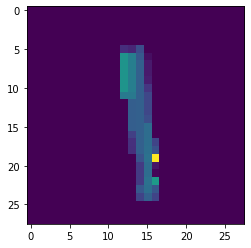

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8]) # change the number inside [] to pass to another image in your dataset
print(x_train[5])

In [ ]:
#build up the model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # instead using np.reshape (input layer)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # 128 number of nodes , 1st layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # repeat for the 2nd layer 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # number of nodes in the output layer is 10 / activation is a softmax function : prop distribution
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4716 - accuracy: 0.8645
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1132 - accuracy: 0.9658
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9781
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9835


In [ ]:
validation_loss,validation_accuracy= model.evaluate(x_test,y_test)
print(validation_loss,validation_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1014 - accuracy: 0.9691
0.10140067338943481 0.9690999984741211


In [ ]:
model.save('epic_num_reader_model')

INFO:tensorflow:Assets written to: epic_num_reader_model/assets


In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader_model')

In [ ]:
#if you want to pridict using the model we have created 
predictions = new_model.predict(x_test)
#print(predictions): its a mess 


In [ ]:
import numpy as np
print(np.argmax(predictions[55]))

0


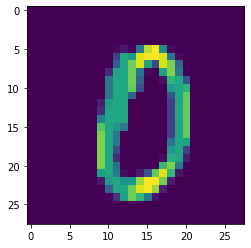

In [ ]:
plt.imshow(x_test[55])
plt.show()